<a href="https://colab.research.google.com/github/dynasty-29/Kaggle-BIPOC-Program-Projects/blob/main/Glass_Classification_A_SVM_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

SVMs are a type of supervised machine learning algorithm that can be used for classification or regression tasks. Oftenly used for classification case.

Their main objective is to find a hyperlane in an N-dimensional space that distinctlt classifies the data points i.e. hyperplane in a high-dimensional space that maximally separates the different classes.

The line that separates the two classes is referred to as a **hyperplane** and the distance between the data points is called **margin**. Finally, the data points nearest to the hyperplane are called **support vectors**.

In one dimension, this line is a point, in 2-Dimension it is a line, in 3-Dimension it becomes a plane and in 4 -Dimensions and above it is called a hyperplane.

The best hyperplane is the one splits the data in a way that it's far away from the support vectors as possible meaning the best hyperplane maximizes the margin.

If we choose a hyperplane that has a low margin, then we run a risk of misclassification. that why we aim to choose the hyperplane that maximizes the margin.

One thing that is important to note is that if we remove any support vector then the hyperplane would change as well. So it right to say that the hyperplane is dependent on the support vectors and not any other observations.

So important notes on SVM:

* Kernel: In SVM, this is a function that quantifies the similarities of two observations. In other words, it is a function that maps a lower dimension data to a higher dimension data. The function of a kernel is to take data as input and transform it into the required form. Kernel can be of different types; Linear, non-linear, polynomial, radial basis function and sigmoid. In this session, we will start by exploring the Linear kernel.  

* Regularization:  Python Scikit-learn library has a regularization parameter denoted by C.  C is the penalty parameter that represents misclassification or the error term. The misclassification or error term tells the SVM optimization how much error is bearable. A small value of C creates a small margin hyperplane and a larger value of C creates a large margin hyperplane. This is how you would optimize your model when your kernel is linear. When creating a model in Scikit-learn the C value is always set to 1.0, however, you can always change it when your dataset has outliers.

For this case study will be classifying glass type. The data was obtained from [Kaggle](https://www.kaggle.com/datasets/uciml/glass).
The data set consist of the following attributes:

    Id number: 1 to 214 (removed from CSV file)
    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron
    Type of glass: (class attribute)
      -- 1 buildingwindowsfloatprocessed 
      -- 2 buildingwindowsnonfloatprocessed 
      -- 3 vehiclewindowsfloatprocessed
      -- 4 vehiclewindowsnonfloatprocessed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data set
glass = pd.read_csv("/content/glass.csv")

In [3]:
#Previewing data set
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#shape
glass.shape

(214, 10)

In [5]:
#statistic summary
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
#checking for nulls
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

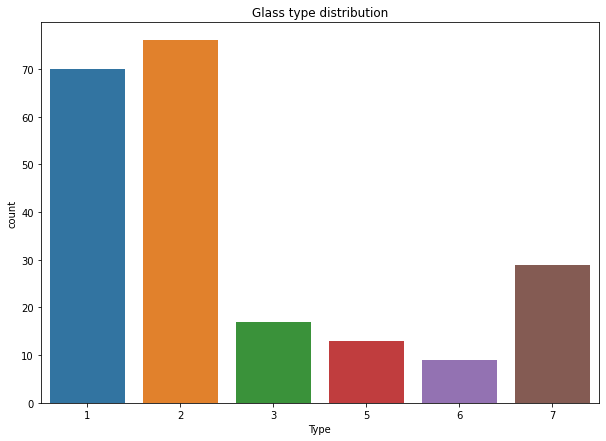

In [7]:
#checking type distribution

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(glass['Type'], label = "Count", ax=ax).set(
    title="Glass type distribution") 
plt.show()

In [8]:
def title(x):
  return x.replace('_', ' ')

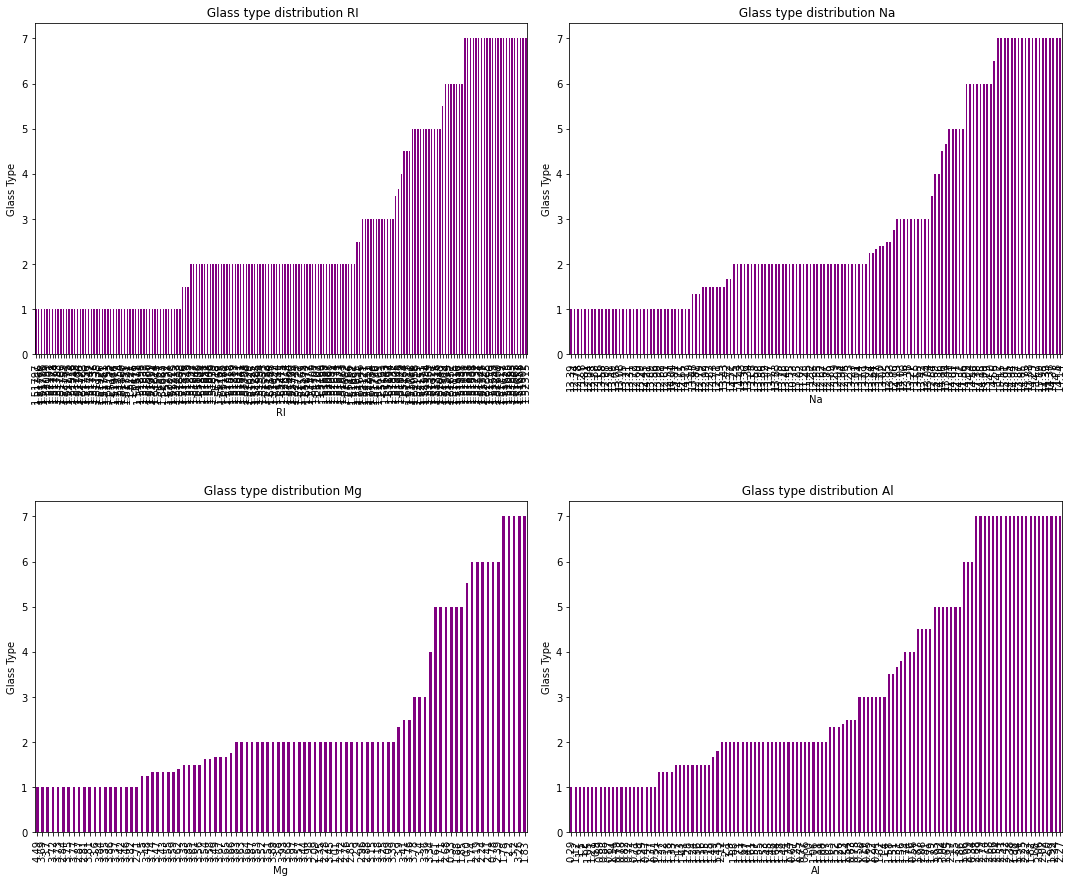

In [9]:
cat = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
    
    glass.groupby([cat[i]])['Type'].mean().nsmallest(glass[cat[i]].nunique()).plot.bar(ax=ax, color='purple')
    
    ax.set_title(f" Glass type distribution {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("Glass Type")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

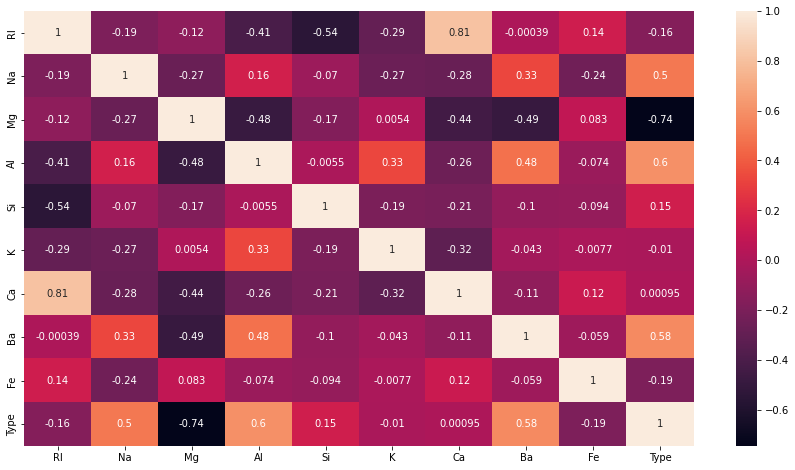

In [10]:
#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(glass.corr(),annot=True)
plt.show()

# **Modelling**

In [11]:
#libraries
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
#preprocessing
g = glass.drop(['Type'], axis=1)

y = glass['Type']


In [13]:
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(g)
X = pca.transform(g)
X.shape

(214, 2)

In [14]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']

**Linear kernel**

In [16]:
# Building a baseline model which will use the linear
classifier = SVC(kernel='linear',degree=3,gamma='scale')
# Training the model using the training set
classifier.fit(X_train, y_train)

SVC(kernel='linear')

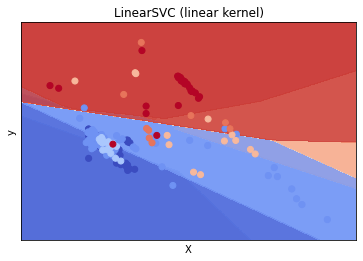

In [17]:
# applying the optimization and regularization set on the kernel
h = .02  # step size in the mesh

from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)']


for i, clf in enumerate((svc, lin_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
  

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [18]:
# making prediction
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46511627906976744


In [20]:

# And now we assess the errors
from sklearn.metrics import classification_report
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           1       0.32      0.78      0.45         9
           2       0.54      0.37      0.44        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.47        43
   macro avg       0.27      0.36      0.29        43
weighted avg       0.41      0.47      0.41        43



We have very small accuracy (47%). If we look at the graph above we see the model is still not able to classify different classes correctly. This could be because we are useing a linear kernel while our target variables is a multiclass case hence this kernel might not be suitable. Let's see using different kernels is our model will improve.

**Polynomial kernel**

Comparing if there is a different between gamma on auto or on scal

*gamma on scale*

In [21]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(kernel='poly')

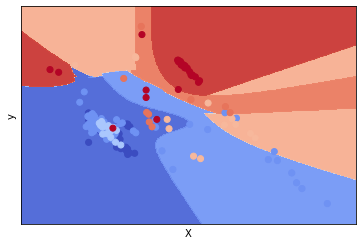

In [22]:
h = .02  # step size in the mesh

from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='poly', C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
  

plt.show()

In [23]:
# making prediction
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3953488372093023


In [25]:


# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.50      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.40        43
   macro avg       0.46      0.41      0.36        43
weighted avg       0.47      0.40      0.33        43



*gamma on auto*

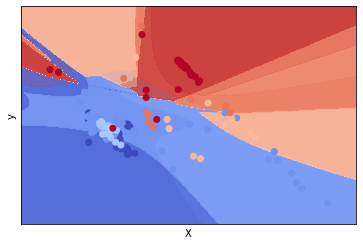

In [26]:
h = .02  # step size in the mesh

from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='poly', C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
  

plt.show()

In [27]:
# making prediction
y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Accuracy: 0.5581395348837209
Report :                precision    recall  f1-score   support

           1       0.20      0.11      0.14         9
           2       0.55      0.84      0.67        19
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.56        43
   macro avg       0.38      0.41      0.38        43
weighted avg       0.45      0.56      0.49        43



We have a higher accruracy when gamma is on auto since the model adjust for itself automatically.

**Radial Function**

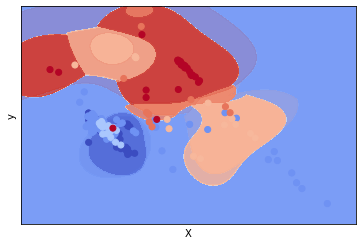

In [29]:
h = .02  # step size in the mesh

from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with RBF']


for i, clf in enumerate((svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
  

plt.show()

In [30]:
# making prediction
y_pred = clf.predict(X_test)

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Accuracy: 0.6046511627906976
Report :                precision    recall  f1-score   support

           1       0.35      0.67      0.46         9
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.60        43
   macro avg       0.45      0.55      0.49        43
weighted avg       0.56      0.60      0.57        43



**Sigmoid Function**

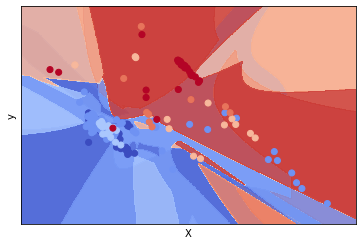

In [32]:
h = .02  # step size in the mesh

from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
sig_svc = svm.SVC(kernel='sigmoid', gamma=0.7, C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with Sigmoid']


for i, clf in enumerate((svc, sig_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
  

plt.show()

In [33]:
# making prediction
y_pred = clf.predict(X_test)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Accuracy: 0.4186046511627907
Report :                precision    recall  f1-score   support

           1       0.24      0.44      0.31         9
           2       0.53      0.42      0.47        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.55      1.00      0.71         6

    accuracy                           0.42        43
   macro avg       0.22      0.31      0.25        43
weighted avg       0.36      0.42      0.37        43



The accuracy score of Linear     is: 47%
The accuracy score of Polynomial is: 56%
The accuracy score of Rbf        is: 60%
The accuracy score of sigmoid     is: 42%


This makes Radial function while using svm